In [11]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [15]:
os.getcwd()

'/Users/main/PycharmProjects/Projects/fetch_interview'

## Brands Tables

In [19]:
brands_file_path = 'data/brands.json'
brands_raw = pd.read_json(brands_file_path, lines=True)

In [53]:
brands_raw.shape

(1167, 8)

In [152]:
brands_raw.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [25]:
brands_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


In [31]:
brands_raw.dtypes

_id              object
barcode           int64
category         object
categoryCode     object
cpg              object
name             object
topBrand        float64
brandCode        object
dtype: object

In [43]:
for col in brands_raw.columns: 
    print(brands_raw[col].value_counts().head())

_id
{'$oid': '601ac115be37ce2ead437551'}    1
{'$oid': '5ffe3a86be37ce7aab2d4fd5'}    1
{'$oid': '55a58727e4b0d0a65b3693cd'}    1
{'$oid': '5f493dabbe37ce64d0ae36bb'}    1
{'$oid': '5f493e72be37ce64d0ae36c1'}    1
Name: count, dtype: int64
barcode
511111305125    2
511111504788    2
511111704140    2
511111004790    2
511111504139    2
Name: count, dtype: int64
category
Baking               369
Beer Wine Spirits     90
Snacks                75
Candy & Sweets        71
Beverages             63
Name: count, dtype: int64
categoryCode
BAKING                  359
CANDY_AND_SWEETS         71
BEER_WINE_SPIRITS        31
HEALTHY_AND_WELLNESS     14
GROCERY                  11
Name: count, dtype: int64
cpg
{'$ref': 'Cogs', '$id': {'$oid': '559c2234e4b06aca36af13c6'}}    98
{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, '$ref': 'Cogs'}    83
{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, '$ref': 'Cogs'}    71
{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368abd3c7065097cc'}}    64
{'$ref': 'Cogs', '$id

* Here we notice the prescence of Nested fields (id and cpg)
* We can use this view to verify the correct dtype assignment for these fields as well
* This view is also helpful to general distribution of values, especially for categorical variables such as topBrand

**Let's quickly fix the nested fields:**

In [76]:
brands_df = brands_raw.copy()

In [80]:
brands_df['_id'] = brands_df['_id'].apply(lambda x: x.get('$oid', None) if isinstance(x, dict) else None)
brands_df.rename(columns={'_id': 'brands_id'}, inplace=True)

In [84]:
brands_df['cpg_ref'] = brands_df['cpg'].apply(lambda x: x.get('$ref', None) if isinstance(x, dict) else None)
brands_df['cpg_id'] = brands_df['cpg'].apply(lambda x: x.get('$id', {}).get('$oid', None) if isinstance(x, dict) else None)

In [90]:
 brands_df.drop(columns=['cpg'],inplace=True)

In [94]:
brands_df.columns

Index(['brands_id', 'barcode', 'category', 'categoryCode', 'name', 'topBrand',
       'brandCode', 'cpg_ref', 'cpg_id'],
      dtype='object')

In [96]:
brands_df.dtypes

brands_id        object
barcode           int64
category         object
categoryCode     object
name             object
topBrand        float64
brandCode        object
cpg_ref          object
cpg_id           object
dtype: object

In [100]:
brands_df = brands_df.astype(str)

In [108]:
for col in brands_df.columns:  
    print(col)
    print(brands_df[col].nunique())

brands_id
1167
barcode
1160
category
24
categoryCode
15
name
1156
topBrand
3
brandCode
898
cpg_ref
2
cpg_id
196


In [128]:
brands_df.barcode.value_counts().head(10)

barcode
511111305125    2
511111504788    2
511111704140    2
511111004790    2
511111504139    2
511111605058    2
511111204923    2
511111903291    1
511111201793    1
511111816546    1
Name: count, dtype: int64

In [124]:
brands_df.query('barcode == "511111504788"')

,brands_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg_ref,cpg_id
9,5c408e8bcd244a1fdb47aee7,511111504788,Baking,nan,test,nan,TEST,Cogs,59ba6f1ce4b092b29c167346
412,5ccb2ece166eb31bbbadccbe,511111504788,Condiments & Sauces,nan,The Pioneer Woman,nan,PIONEER WOMAN,Cogs,559c2234e4b06aca36af13c6


* We notice that brandCode has "test" items here (this is removed in the clean up portion of etl_items script)
* It appears that the category and cpg_id are different for the same barcode
* 7 of the records appear to share the same barcode in our sample, while this represents a small portion of the sample, it can be much larger outside of this sample

In [133]:
brands_df.category.value_counts()

category
Baking                         369
nan                            155
Beer Wine Spirits               90
Snacks                          75
Candy & Sweets                  71
Beverages                       63
Magazines                       44
Health & Wellness               44
Breakfast & Cereal              40
Grocery                         39
Dairy                           33
Condiments & Sauces             27
Frozen                          24
Personal Care                   20
Baby                            18
Canned Goods & Soups            12
Beauty                           9
Cleaning & Home Improvement      6
Deli                             6
Beauty & Personal Care           6
Household                        5
Bread & Bakery                   5
Dairy & Refrigerated             5
Outdoor                          1
Name: count, dtype: int64

### brandCode & barcode association
* This field was mostly cleaned in the etl_items portion of the pipeline; here are a few things that were noticed during EDA:
    * Multiple test records exists  (removed by filtering out "test")
    * Multiple records contained 4011; which appears to be matched to ITEM NOT FOUND in the description field (these were removed)
    * Fruits and Vegetables seem to be assigned a 4 or 5 digit code (These were dropped as they don't contain brand information and are not relevant to answering the SQL questions)


## Users Table

In [146]:
users_file_path = 'data/users.json'
users_raw = pd.read_json(users_file_path, lines=True)

In [148]:
users_raw.shape

(495, 7)

In [150]:
users_raw.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [156]:
users_df = users_raw.copy()

In [158]:
users_df['_id'] = users_df['_id'].apply(lambda x: x.get('$oid', None) if isinstance(x, dict) else None)
users_df.rename(columns={'_id': 'user_id'}, inplace=True)

In [160]:
date_fields = ['createdDate', 'lastLogin']
for field in date_fields:
    users_df[field] = users_df[field].apply(
        lambda x: pd.to_datetime(x.get('$date', None), unit='ms') if isinstance(x, dict) else None
        )

In [162]:
users_df.head()

,user_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.554,2021-01-03 15:25:30.597,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI


In [166]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       495 non-null    object        
 1   active        495 non-null    bool          
 2   createdDate   495 non-null    datetime64[ns]
 3   lastLogin     433 non-null    datetime64[ns]
 4   role          495 non-null    object        
 5   signUpSource  447 non-null    object        
 6   state         439 non-null    object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 23.8+ KB


In [170]:
users_df.dtypes

user_id                 object
active                    bool
createdDate     datetime64[ns]
lastLogin       datetime64[ns]
role                    object
signUpSource            object
state                   object
dtype: object

In [174]:
for col in users_df.columns: 
    print(users_df[col].value_counts().head())

user_id
54943462e4b07e684157a532    20
5fc961c3b8cfca11a077dd33    20
5ff5d15aeb7c7d12096d91a2    18
5fa41775898c7a11a6bcef3e    18
59c124bae4b0299e55b0f330    18
Name: count, dtype: int64
active
True     494
False      1
Name: count, dtype: int64
createdDate
2014-12-19 14:21:22.381    20
2020-12-03 22:08:03.936    20
2021-01-06 15:03:54.680    18
2020-11-05 15:17:09.396    18
2017-09-19 14:07:54.302    18
Name: count, dtype: int64
lastLogin
2021-03-05 16:52:23.204    20
2021-02-26 22:39:16.799    20
2021-01-06 15:08:10.009    18
2021-03-04 16:02:02.026    18
2021-02-08 16:42:58.117    18
Name: count, dtype: int64
role
consumer       413
fetch-staff     82
Name: count, dtype: int64
signUpSource
Email     443
Google      4
Name: count, dtype: int64
state
WI    396
NH     20
AL     12
OH      5
IL      3
Name: count, dtype: int64


* It appears we have several records with repeating user_id   

In [183]:
for col in users_df.columns:  
    print(col)
    print(users_df[col].nunique())

user_id
212
active
2
createdDate
212
lastLogin
172
role
2
signUpSource
2
state
8


* This table should only contain one record per user, we will deduplicate based on user_id ;  
* This table also does not appear to monitor changes in state (i.e. when a user was deactivated or reactivated); this allows us to safely deduplicate these records

In [190]:
users_df = users_df.drop_duplicates()

In [192]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 475
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       212 non-null    object        
 1   active        212 non-null    bool          
 2   createdDate   212 non-null    datetime64[ns]
 3   lastLogin     172 non-null    datetime64[ns]
 4   role          212 non-null    object        
 5   signUpSource  207 non-null    object        
 6   state         206 non-null    object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 11.8+ KB


In [194]:
for col in users_df.columns:  
    print(col)
    print(users_df[col].nunique())

user_id
212
active
2
createdDate
212
lastLogin
172
role
2
signUpSource
2
state
8


* Let's quickly take a look at when these users signed up and last logged in (we'll use a histogram to quickly visualize this): 

<Axes: title={'center': 'Occurrences per Month-Year'}, xlabel='month_year'>

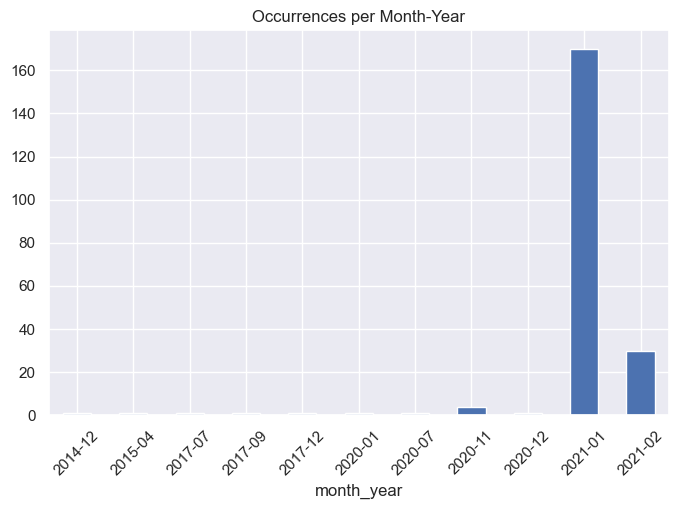

In [215]:
users_df['month_year'] = users_df['createdDate'].dt.to_period('M')  
users_df['month_year'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5), rot=45, title="Occurrences per Month-Year")

<Axes: title={'center': 'Occurrences per Month-Year'}, xlabel='month_year'>

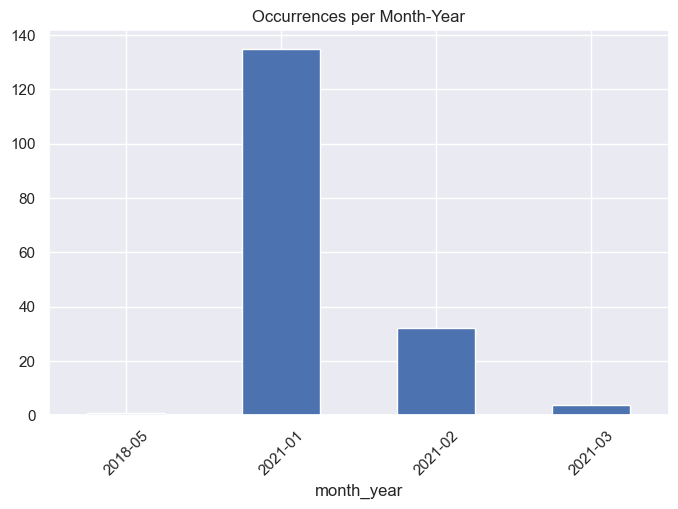

In [217]:
users_df['month_year'] = users_df['lastLogin'].dt.to_period('M')  
users_df['month_year'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5), rot=45, title="Occurrences per Month-Year")

* The majority of the users created an account in Jan 2021, and last used the app then;  
* This data (when collected over a longer period of time) can be useful to look at churn and retention

## Receipts Table

In [227]:
receipts_file_path = 'data/receipts.json'
receipts_raw = pd.read_json(receipts_file_path, lines=True)

In [229]:
receipts_raw.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [387]:
receipts_df = receipts_raw.copy()

In [389]:
date_fields = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']
for field in date_fields:
    receipts_df[field] = receipts_df[field].apply(
        lambda x: pd.to_datetime(x.get('$date', None), unit='ms') if isinstance(x, dict) else None
    )

receipts_df['_id'] = receipts_df['_id'].apply(lambda x: x.get('$oid', None) if isinstance(x, dict) else None)
receipts_df.rename(columns={'_id': 'receipt_id'}, inplace=True)

In [391]:
receipts_df.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [393]:
receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   receipt_id               1119 non-null   object        
 1   bonusPointsEarned        544 non-null    float64       
 2   bonusPointsEarnedReason  544 non-null    object        
 3   createDate               1119 non-null   datetime64[ns]
 4   dateScanned              1119 non-null   datetime64[ns]
 5   finishedDate             568 non-null    datetime64[ns]
 6   modifyDate               1119 non-null   datetime64[ns]
 7   pointsAwardedDate        537 non-null    datetime64[ns]
 8   pointsEarned             609 non-null    float64       
 9   purchaseDate             671 non-null    datetime64[ns]
 10  purchasedItemCount       635 non-null    float64       
 11  rewardsReceiptItemList   679 non-null    object        
 12  rewardsReceiptStatus     1119 non-

* Since we deal with the nested field rewardsReceiptItemList as a seperate table so it is dropped from this discussion

In [396]:
receipts_df.drop(columns='rewardsReceiptItemList',inplace=True)

<Axes: >

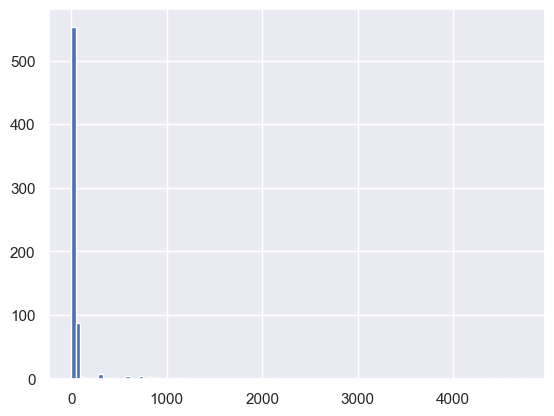

In [259]:
receipts_df.totalSpent.hist(bins=100)

In [265]:
receipts_df.totalSpent.describe()

count     684.000000
mean       77.796857
std       347.110349
min         0.000000
25%         1.000000
50%        18.200000
75%        34.960000
max      4721.950000
Name: totalSpent, dtype: float64

In [269]:
receipts_df.totalSpent.median()

18.2

In [267]:
receipts_df.purchasedItemCount.describe()

count    635.00000
mean      14.75748
std       61.13424
min        0.00000
25%        1.00000
50%        2.00000
75%        5.00000
max      689.00000
Name: purchasedItemCount, dtype: float64

In [271]:
receipts_df.purchasedItemCount.median()

2.0

In [273]:
receipts_df.query('purchasedItemCount > 500')

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
446,600f24970a720f053500002f,NaN,NaN,2021-01-25 20:05:43,2021-01-25 20:05:43,NaT,2021-01-25 20:25:25,NaT,NaN,2021-01-25,599.0,FLAGGED,4368.80,600f20c15edb787dce060911
469,600f39c30a7214ada2000030,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-25 21:36:03,2021-01-25 21:36:03,2021-01-26 03:06:03,2021-01-26 03:07:40,2021-01-26 03:06:03,7137.2,2021-01-24,670.0,FINISHED,4721.95,600f35015edb782098e2ac1b
543,600f2fc80a720f0535000030,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-25 20:53:28,2021-01-25 20:53:28,2021-01-25 22:04:23,2021-01-28 22:37:02,2021-01-25 22:04:23,4944.7,2021-01-24,689.0,FINISHED,4566.17,600f29a64329897eac239049


* Some data quality checks here would be to look at the outliers in $Spend or total quantity and comapre to the mean/median.  
* We notice that there are some zero values which most likely suggests an error  
* We notice that there are no negative values (another type of common data error)

In [280]:
receipts_df.rewardsReceiptStatus.value_counts()

rewardsReceiptStatus
FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: count, dtype: int64

* This is related to question 3 & 4; this shows the pipeline from submittal to final approval;
* It appears there is a "Flagged" mechanism (this presumably can occur form the user or admin)
* Further analysis can be done to look at how long it normally takes for each receipt to transition through the approval flow
  


<Axes: >

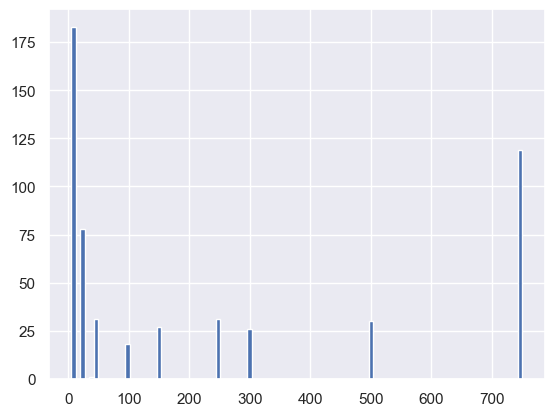

In [288]:
receipts_df.bonusPointsEarned.hist(bins=100)

In [290]:
receipts_df.bonusPointsEarned.describe()

count    544.000000
mean     238.893382
std      299.091731
min        5.000000
25%        5.000000
50%       45.000000
75%      500.000000
max      750.000000
Name: bonusPointsEarned, dtype: float64

In [292]:
receipts_df.bonusPointsEarnedReason.value_counts()

bonusPointsEarnedReason
All-receipts receipt bonus                                                             183
Receipt number 1 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)    119
COMPLETE_NONPARTNER_RECEIPT                                                             71
COMPLETE_PARTNER_RECEIPT                                                                39
Receipt number 3 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     31
Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     30
Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     27
Receipt number 4 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     26
Receipt number 6 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     18
Name: count, dtype: int64

## Items (derived from rewardsReceiptItemList)

In [381]:
receipts_file_path = "data/receipts.json"
receipts = pd.read_json(receipts_file_path, lines=True)

# Function to flatten nested `rewardsReceiptItemList` field
def flatten_nested_field_to_rows(df, nested_field, id_column):
    flattened_rows = []
    for _, row in df.iterrows():
        if isinstance(row[nested_field], list):
            for item in row[nested_field]:
                flattened_row = {id_column: row['_id'].get('$oid', None) if isinstance(row['_id'], dict) else None}
                flattened_row.update(item)
                flattened_rows.append(flattened_row)
    return pd.DataFrame(flattened_rows) 
receipt_items_flattened = flatten_nested_field_to_rows(receipts, 'rewardsReceiptItemList', 'receipt_id')

In [383]:
items = receipt_items_flattened.copy()

In [385]:
items.head()

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
items.barcode.value_counts()

barcode
4011            177
036000320893     92
034100573065     90
036000391718     87
012000809941     76
               ... 
4562              1
021000701445      1
021000026999      1
686924560242      1
665290001184      1
Name: count, Length: 568, dtype: int64

In [329]:
items.description.value_counts()

description
ITEM NOT FOUND                                                         173
KLARBRUNN 12PK 12 FL OZ                                                120
HUGGIES SIMPLY CLEAN PREMOISTENED WIPE FRAGRANCE FREE BAG 216 COUNT     92
MILLER LITE 24 PACK 12OZ CAN                                            90
KLEENEX POP UP RECTANGLE BOX FACIAL TISSUE 2 PLY 8PK 160 CT             87
                                                                      ... 
434 BETTYCRKRB                                                           1
433 KROGERSOUR                                                           1
430 DOLESALAD K                                                          1
424 RAGU PASTAS                                                          1
Berry Strawberry Conventional, 16 Ounce                                  1
Name: count, Length: 1889, dtype: int64

In [331]:
items.needsFetchReview.value_counts()

needsFetchReview
False    594
True     219
Name: count, dtype: int64

In [335]:
items.userFlaggedBarcode.nunique()

6

In [337]:
items.userFlaggedBarcode.value_counts()

userFlaggedBarcode
034100573065    166
4011            107
1234             32
028400642255     13
079400066619     10
075925306254      9
Name: count, dtype: int64

In [343]:
items.query('userFlaggedBarcode == "034100573065"')

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
25,5f9c74f70a7214ad07000037,NaN,NaN,NaN,NaN,True,2,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,5f9c74f70a7214ad07000037,NaN,NaN,NaN,NaN,True,3,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,5f9c74f70a7214ad07000037,NaN,NaN,NaN,NaN,True,4,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,5f9c74f70a7214ad07000037,NaN,NaN,NaN,NaN,True,5,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,5f9c74f70a7214ad07000037,NaN,NaN,NaN,NaN,True,6,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,5fb2da580a7214ad89000114,NaN,NaN,NaN,NaN,True,7,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6766,5fb2da580a7214ad89000114,NaN,NaN,NaN,NaN,True,8,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6767,5fb2da580a7214ad89000114,NaN,NaN,NaN,NaN,True,9,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6768,5fb2da580a7214ad89000114,NaN,NaN,NaN,NaN,True,10,True,NaN,034100573065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
barcodeTest = items.query('userFlaggedBarcode == "034100573065"')

In [349]:
barcodeTest.description.value_counts()

description
MILLER LITE 24 PACK 12OZ CAN    30
Name: count, dtype: int64

* userFlaggedBarcode is worth investigating further, it was not used in our analysis as it contributed to very little barcode/brandCode identification

In [357]:
# ReceiptID final price and ReceiptsDF TotalSum & Quantity

In [373]:
items[['finalPrice', 'itemPrice','quantityPurchased']] = items[['finalPrice', 'itemPrice','quantityPurchased']].astype('float')

In [375]:
itemsSums = items.groupby(['receipt_id'])[['finalPrice', 'itemPrice','quantityPurchased']].sum().reset_index()

In [377]:
itemsSums.head()

,receipt_id,finalPrice,itemPrice,quantityPurchased
0,5f9c74f70a7214ad07000037,1.0,1.0,1.0
1,5f9c74f90a7214ad07000038,14.0,14.0,6.0
2,5fa5ad370a720f05ef000089,291.0,291.0,11.0
3,5fa5b0ca0a720f05ef0000bf,14.0,14.0,6.0
4,5fa8d5730a7214adc30001c3,1.0,1.0,1.0


In [412]:
receiptsSums = receipts_df[['receipt_id','totalSpent','purchasedItemCount']]

In [416]:
receiptsSums.head()

,receipt_id,totalSpent,purchasedItemCount
0,5ff1e1eb0a720f0523000575,26.0,5.0
1,5ff1e1bb0a720f052300056b,11.0,2.0
2,5ff1e1f10a720f052300057a,10.0,1.0
3,5ff1e1ee0a7214ada100056f,28.0,4.0
4,5ff1e1d20a7214ada1000561,1.0,2.0


In [418]:
comps = pd.merge(receiptsSums, itemsSums, on='receipt_id', how='inner').fillna(0)

In [420]:
comps.shape

(679, 6)

In [422]:
comps.head()

,receipt_id,totalSpent,purchasedItemCount,finalPrice,itemPrice,quantityPurchased
0,5ff1e1eb0a720f0523000575,26.0,5.0,26.00,26.00,5.0
1,5ff1e1bb0a720f052300056b,11.0,2.0,11.00,11.00,2.0
2,5ff1e1f10a720f052300057a,10.0,1.0,0.00,0.00,0.0
3,5ff1e1ee0a7214ada100056f,28.0,4.0,28.00,28.00,4.0
4,5ff1e1d20a7214ada1000561,1.0,2.0,3.56,3.56,4.0


In [436]:
comps.query("totalSpent != finalPrice")

,receipt_id,totalSpent,purchasedItemCount,finalPrice,itemPrice,quantityPurchased
2,5ff1e1f10a720f052300057a,10.00,1.0,0.00,0.00,0.0
4,5ff1e1d20a7214ada1000561,1.00,2.0,3.56,3.56,4.0
106,5ff618e30a7214ada10005fa,52.12,16.0,52.12,52.12,16.0
136,5ff726810a720f05230005ea,1.00,2.0,3.56,3.56,4.0
160,5ff874050a7214ada100065d,1.00,2.0,3.56,3.56,4.0
196,5ffcb4ad0a720f0515000009,1.00,2.0,3.56,3.56,4.0
199,5ffc9d9c0a7214adca00004b,10.00,1.0,24.00,24.00,5.0
203,5ffcb4b80a7214ad4e00000d,10.00,1.0,22.00,22.00,1.0
274,6000d4b50a720f05f3000078,10.00,1.0,0.00,0.00,0.0
289,6002590c0a7214ad4c000082,746.94,208.0,746.94,746.94,208.0


In [430]:
comps.query("totalSpent != itemPrice").shape

(24, 6)

* Do we use itemPrice or finalPrice?
* Why do some of these not line up with receipt's totalSpent

In [444]:
comps.query("purchasedItemCount != quantityPurchased").head()

,receipt_id,totalSpent,purchasedItemCount,finalPrice,itemPrice,quantityPurchased
2,5ff1e1f10a720f052300057a,10.0,1.0,0.00,0.00,0.0
4,5ff1e1d20a7214ada1000561,1.0,2.0,3.56,3.56,4.0
13,5f9c74f70a7214ad07000037,1.0,11.0,1.00,1.00,1.0
19,5ff1e1c80a720f052300056d,1.0,2.0,1.00,1.00,1.0
24,5ff1e1c60a7214ada100055e,1.0,2.0,1.00,1.00,1.0


* Similar issue appears when comparing the quantities in a receipt to the quantities in the items-list 

## Brands - Receipts/Items Key 
* Further exploration was done to figure out which fields to use to join these two tables;  
* barcode (counterintuitively) did not prove to be helpful in this regards (even though this may presents an opportunity for data improvement. 
* brandCode seemed to be the best option, but further partial string matching was used to enhance the field (in etl_items.py)